### Nama  : Radam Gumelar
### NIM   : 164231032
### Pratikum 13

1. Jalankan program dibawah ini dan berikan penjelasan

### **Import modul yang dibutuhkan**

In [1]:
import numpy as np      # modul untuk memproses data numerik
import pandas as pd     # modul untuk memproses dataframe
import sklearn          # modul untuk analisis statistik
from sklearn.model_selection import train_test_split    # modul untuk membagi dataset menjadi 2 (train dan test)
from sklearn.metrics import confusion_matrix            # untuk menghitung matriks konfusi (yang menunjukkan jumlah prediksi benar salah)
from sklearn.tree import DecisionTreeClassifier         # untuk membuat model klasifikasi decision tree
import sklearn.metrics as metrics           # biasanya untuk menghitung akurasi klasifikasi
from matplotlib import pyplot as plt        # membuat plot dan visualisasinya
from sklearn import datasets                # memuat dataset
from sklearn import tree                    # membuat pohon keputusan
import seaborn as sns                       # untuk membuat plot statistik yang bisa di custom

### **Membaca datasets**

In [2]:
#loading datasets
dataset = pd.read_csv("F:/UNAIR/ALGORITMA PEMROGRAMAN/Iris_Data.csv")

karena file dalam format csv, maka menggunakan fungsi `pd.read_csv` untuk membaca excell<br>
jangan lupa untuk memanggil file dengan path yang benar

### **Penentuan variabel x dan y**

In [3]:
X = dataset.drop('species', axis=1)
Y = dataset['species']

- `X = dataset.drop('species', axis=1)` = deklarasi Dataframe baru "X" dengan menghapus kolom bernama 'species' (menggunakan `.drop`) dari dataframe yg sudah dibaca. `axis=1` menunjukkan bahwa yang di hapus adalah 1 kolom
- `Y = dataset['species']` = deklarasi Dataframe baru "Y" dengan mengambil kolom bernama 'species'

**Kesimpulan:**<br>
1. Variabel Independen (X) : sepal_length, sepal_width, petal_length, petal width
2. Variabel Dependen (Y) : species

### **Split Datasets**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state=100)

membagi dataset menjadi 2 proporsi (30% data test dan 70% data train)

**penjelasan:**<br>
- X_train   = menyimpan set data train 
- X_test    = menyimpan set data uji
- y_train   = menyimpan nilai variabel target data train
- y_test    = menyimpan nilai variabel target data uji

### **Mendeklarasikan Nama Kelas dan Jumlahnya**

In [13]:
X.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
Y.columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

program diatas memberikan nama kolom pada dataframe X dan dataframe Y

### **Membuat model decission tree dari library sklearn**

In [6]:
clf = DecisionTreeClassifier(random_state=100)

membuat model klasifikasi decision tree unntuk memprediksi kelas bunga iris berdasarkan fiturnya 

### **Memasukkan data training kedalam model decision tree**

In [7]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

### **Melakukan prediksi terhadap data testing (testing data)**

In [8]:
Y_pred = clf.predict(X_test)
print(Y_pred)

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa']


### **Menampilkan akurasi dari model dan menampilkan confussion matrix**

In [9]:
print("Accuracy", metrics.accuracy_score(y_test, Y_pred))
cm = np.array(confusion_matrix(y_test,Y_pred))
print("===CONFUSION MATRIX===")
print(cm)

Accuracy 0.9555555555555556
===CONFUSION MATRIX===
[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


**penjelasan:**<br>
- `print("Accuracy", metrics.accuracy_score(y_test, Y_pred))` menampilkan nilai akurasi klasifikasi decision tree
  - fungsi `accuracy_score` menghitung proporsi prediksi yang benar dari model yang dibuat. hasilnya biasanya angka desimal dari 0 sampai 1 dengan 1 adalah akurasi sempurna
- `cm = np.array(confusion_matrix(y_test,Y_pred))` = menampilkan jumlah prediksi yang benar dan salah, kemudian ditampilkan dalam bentuk matriks

**KESIMPULAN**<br>
- akurasi klasifikasi = 95%

### **Menampilkan grafik decision tree**

C:\Users\Acer\AppData\Local\Temp\ipykernel_15992\1073848882.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


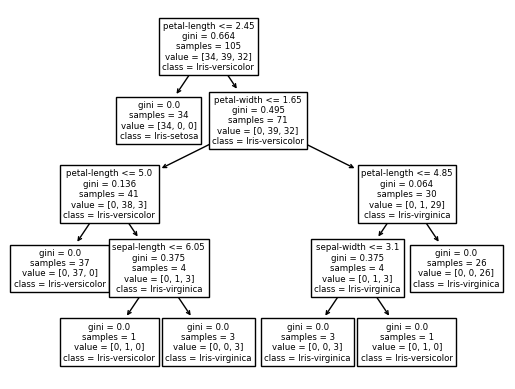

In [17]:
fig1 = plt.figure(1)
tree.plot_tree(clf, feature_names=X.columns, class_names = Y.columns,)
fig1.show()

**PENJELASAN DECISION TREE KLASIFIKASI BUNGA IRIS:**<br>
jalur decision tree dimulai dengan node root awal adalah dengan menggunakan klasifikasi `petal-length`
  1. node 1 : jika nilai `petal-length` kurang dari atau sama dengan 2.45, maka dia berkemungkinan ke cabang kiri (True). Jika tidak, maka dia berkemungkinan ke cabang kanan (False) dan menuju node 2<br>
   **di cabang kiri, karena nilai gini = 0.0 maka dipastikan 34 sampel berkemungkinan memiliki kelas bunga iris-setosa**<br>
   *di cabang kanan, terdapat 71 sampel yang berkemungkinan iris versicolor tetapi masih perlu diklasifikasikan ke node berikutnya*
  2. node 2 : jika nilai `petal-width` kurang dari atau sama dengan 1.65, maka dia berkemungkinan ke cabang kanan (True) dan lanjut ke node 3 kanan. jika tidak, maka dia berkemungkinan ke cabang kiri (False) dan lanjut ke node 3 Kiri.<br>
   *di cabang kanan, terdapat 30 sampel yang berkemungkinan iris-virginica tetapi masih perlu diklasifikasikan ke node berikutnya*<br>
   *di cabang kiri, terdapat 41 sampel yang berkemungkinan iris-versicolor tetapi masih perlu diklasifikasikan ke node berikutnya*
  3. node 3 kanan : jika nilai `petal-length` kurang dari atau sama dengan 4.85, maka dia berkemungkinan ke cabang kanan (True). jika tidak, maka dia berkemungkinan ke cabang kiri (false) dan lanjut ke node berikutnya<br>
   **di cabang kanan, karena nilai gini = 0.0 maka dipastikan 26 sampel berkemungkinan memiliki kelas bunga iris-virginica**<br>
   di cabang kiri, terdapat 4 sampel yang berkemungkinan memiliki kelas bunga iris-virginica tetapi masih perlu diklasifikasikan ke node berikutnya
      1. node 4 : jika nilai `sepal-width` kurang dari atau sama dengan 3.1, maka dia berkemungkinan ke cabang kanan (True). jika tidak, maka dia berkemungkinan ke cabang kiri (false)<br>
      **di cabang kanan, karena nilai gini = 0.0 maka dipastikan 1 sampel berkemungkinan memiliki kelas bunga iris-versicolor**<br>
      **di cabang kiri, karena nilai gini = 0.0 maka dipastikan 3 sampel berkemungkinan memiliki kelas bunga iris-virginica**
   4. node 3 kiri : jika nilai `petal-length` kurang dari atau sama dengan 5, maka dia berkemungkinan ke cabang kiri (True). jika tidak, maka dia berkemungkinan ke cabang kanan (false) dan lanjut ke node berikutnya<br>
   **di cabang kiri, karena nilai gini = 0.0 maka dipastikan 37 sampel berkemungkinan memiliki kelas bunga iris-versicolor**<br>
   *di cabang kanan, terdapat 4 sampel yang berkemungkinan memiliki kelas bunga iris-virginica tetapi masih perlu diklasifikasikan ke node berikutnya*
      1. node 4 : jika nilai `sepal-length` kurang dari atau sama dengan 6.05, maka dia berkemungkinan ke cabang kiri (True). jika tidak, maka dia berkemungkinan ke cabang kanan (false)<br>
      **di cabang kanan, karena nilai gini = 0.0 maka dipastikan 3 sampel berkemungkinan memiliki kelas bunga iris-virginica**<br>
      **di sampel kiri, karena nilai gini = 0.0 maka dipastikan 1 sampel berkemungkinan memiliki kelas bunga iris-versicolor**


**KESIMPULAN**<br>
Total Jumlah Bunga: 185<br>
1. IRIS-SETOSA = 34
2. IRIS-VERSICOLOR = 39 
3. IRIS-VIRGINICA = 32

### **Grafik Confussion Matrix**

C:\Users\Acer\AppData\Local\Temp\ipykernel_15992\3727139490.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


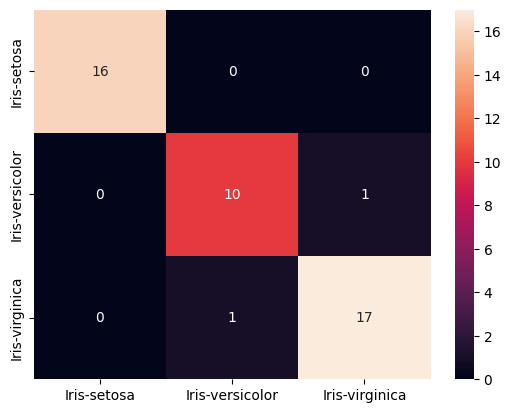

In [16]:
fig2 = plt.figure(2)
sna = sns.heatmap(cm, annot=True, xticklabels=Y.columns, yticklabels=Y.columns)
fig2.show()

**PENJELASAN CONFUSSION MATRIX**<br>
1. dari total 16 prediksi **bunga iris-setosa**, semua dapat benar terprediksi sebagai iris-setosa sebanyak 16 sampel
2. dari total 11 prediksi **bunga iris-versicolor**, 10 sampel benar terprediksi sebagai iris-versicolor dan 1 sampel terprediksi iris-virginica
3. dari totral 17 prediksi **bunga iris-virginica**, 17 sampel benar terprediksi sebagai iris-virginica dan 1 sampel terprediksi iris-versicolor